<a href="https://colab.research.google.com/github/Sudhan-12/Crack-detection-using-CNN/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense , Flatten

In [ ]:
data_train_path = '/content/crack_dataset_new/training_dataset'
data_test_path = '/content/crack_dataset_new/testing_dataset'
data_validation_path = '/content/crack_dataset_new/Validation_dataset'

In [ ]:
img_width= 180
img_height=180

Data set from the disk to made into array dataset
**bold text**

In [ ]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle= False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False

)


Found 2908 files belonging to 2 classes.


In [ ]:
data_test= keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_width, img_height),
    batch_size=32,
    shuffle=False,
    validation_split=False
)

Found 110 files belonging to 2 classes.


In [ ]:
data_validation = keras.utils.image_dataset_from_directory(
    data_validation_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 110 files belonging to 2 classes.


In [ ]:
data_cat = data_train.class_names
data_cat

['negative', 'positive']

### Positive Crack **images**

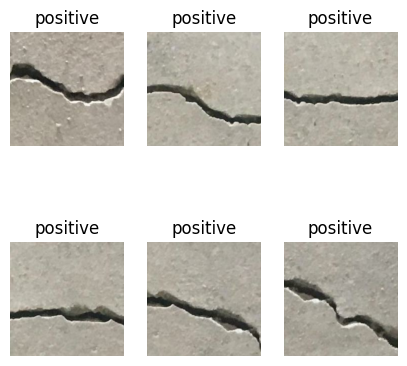

In [ ]:
 plt.figure(figsize=(5,5))
 for image , labels in data_train.take(100):
  for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(data_cat[labels[i]])
    plt.axis('off')


### Negative Crack **Images**

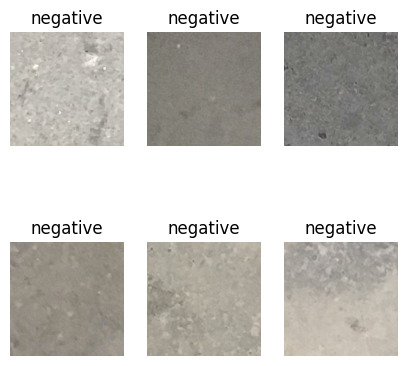

In [ ]:
plt.figure(figsize=(5,5))
for image , labels in data_train.take(1):
  for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(data_cat[labels[i]])
    plt.axis('off')


### **Model**

In [ ]:
model= Sequential()
model.add(layers.Rescaling(1./255))
model.add(Conv2D(64,(3,3),activation = 'relu',padding='same',input_shape=(180,180,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),padding='same',activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),padding='same',activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(Dense(2,activation= 'softmax'))


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),optimizer='adam',metrics=['accuracy'],run_eagerly=True)

In [ ]:
epochs_size=10
model.fit(data_train,validation_data=data_validation,epochs=epochs_size)

Epoch 1/10
91/91 [==============================] - 389s 4s/step - loss: 8.4440 - accuracy: 0.9089 - val_loss: 64.0847 - val_accuracy: 0.5000
Epoch 2/10
91/91 [==============================] - 380s 4s/step - loss: 7.0754 - accuracy: 0.8177 - val_loss: 76.8084 - val_accuracy: 0.5000
Epoch 3/10
91/91 [==============================] - 367s 4s/step - loss: 5.3435 - accuracy: 0.7538 - val_loss: 8.4589 - val_accuracy: 0.5000
Epoch 4/10
91/91 [==============================] - 382s 4s/step - loss: 1.5019 - accuracy: 0.4587 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 5/10
91/91 [==============================] - 370s 4s/step - loss: 0.7094 - accuracy: 0.3126 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 6/10
91/91 [==============================] - 382s 4s/step - loss: 0.7047 - accuracy: 0.3229 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 7/10
91/91 [==============================] - 379s 4s/step - loss: 0.7031 - accuracy: 0.3277 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 8/10


In [ ]:
model = Sequential()
model.add(layers.Rescaling(1./255))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(180, 180, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
optimizer = keras.optimizers.Adam(lr=0.0001)

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

epochs_size = 10  # Increase the number of epochs
#model.summary()  # Print model summary for review

# Assuming data_train and data_validation are your training and validation datasets respectively


In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_17 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_51 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_51 (MaxPooli  (None, 90, 90, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_52 (Conv2D)          (None, 88, 88, 32)        18464     
                                                                 
 max_pooling2d_52 (MaxPooli  (None, 44, 44, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_53 (Conv2D)          (None, 42, 42, 128)     

In [ ]:
saving_weights = keras.callbacks.ModelCheckpoint(
    'weights.{epoch:02d}-{val_loss:.2f}.hdf5', #save our output as we go through.
    monitor='val_loss', verbose=0, save_best_only=False, #for each epoch, give me the validation loss.
    save_weights_only=False, mode='auto', period=10)

reduce_lr = keras.callbacks.ReduceLROnPlateau( #lr = learning rate - we want a big step size up front to speed up the process, but smaller steps later on to ensure we don't overshoot the minimum)
    monitor='val_loss', factor=0.1, patience=20,
    verbose=0, mode='auto', min_delta=0.0001, min_lr=0)

nan_problem = keras.callbacks.TerminateOnNaN()

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=20,
    verbose=0, mode='auto', baseline=None, restore_best_weights=False)

csv_logger = keras.callbacks.CSVLogger('training.log') #write information about my model to a file

In [ ]:
cnn_1a = model.fit(data_train,
               epochs=20,
               batch_size=500,
               validation_data=(data_validation),
               callbacks=[csv_logger, early_stop, nan_problem, reduce_lr, saving_weights])

Epoch 1/20
91/91 [==============================] - 239s 3s/step - loss: 0.1586 - accuracy: 0.9605 - val_loss: 3.1030 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 2/20
91/91 [==============================] - 232s 3s/step - loss: 0.4160 - accuracy: 0.7730 - val_loss: 2.8646 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 3/20
91/91 [==============================] - 226s 2s/step - loss: 0.3928 - accuracy: 0.7944 - val_loss: 2.9404 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 4/20
91/91 [==============================] - 224s 2s/step - loss: 0.3279 - accuracy: 0.8642 - val_loss: 2.8615 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 5/20
91/91 [==============================] - 226s 2s/step - loss: 0.3127 - accuracy: 0.8834 - val_loss: 2.8539 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 6/20
91/91 [==============================] - 227s 2s/step - loss: 0.2997 - accuracy: 0.8900 - val_loss: 2.8400 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 7/20
91/91 [==============================] - 228s 3s/step - loss: 0.2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 11/20
91/91 [==============================] - 228s 3s/step - loss: 0.2165 - accuracy: 0.9364 - val_loss: 2.3762 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 12/20
91/91 [==============================] - 229s 3s/step - loss: 0.2025 - accuracy: 0.9371 - val_loss: 2.2474 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 13/20
91/91 [==============================] - 232s 3s/step - loss: 0.1918 - accuracy: 0.9374 - val_loss: 2.1548 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 14/20
91/91 [==============================] - 233s 3s/step - loss: 0.1833 - accuracy: 0.9409 - val_loss: 2.1554 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 15/20
91/91 [==============================] - 226s 2s/step - loss: 0.1709 - accuracy: 0.9532 - val_loss: 2.0570 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 16/20
91/91 [==============================] - 228s 2s/step - loss: 0.1643 - accuracy: 0.9543 - val_loss: 2.0573 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 17/20
91/91 [==============================] - 225s 2s/step - lo

In [ ]:
#model.predict(data_test)
#plt.figure(figsize=(5,5))
data_test1=np.array(data_test)

#plt.imshow(data_test1[0].astype('uint8'))
  #plt.title(data_cat[labels[i]])
#plt.axis('off')
model.predict(data_test)

4/4 [==============================] - 4s 807ms/step


array([[0.9855109 ],
       [0.9840559 ],
       [0.9864357 ],
       [0.98549855],
       [0.9861617 ],
       [0.9856656 ],
       [0.98497415],
       [0.9847693 ],
       [0.98620385],
       [0.98647976],
       [0.9870727 ],
       [0.98561627],
       [0.9833011 ],
       [0.98298305],
       [0.9865851 ],
       [0.98626125],
       [0.9863723 ],
       [0.98608714],
       [0.98608965],
       [0.985298  ],
       [0.9854723 ],
       [0.9856688 ],
       [0.9859043 ],
       [0.98564214],
       [0.9867636 ],
       [0.9848052 ],
       [0.98345786],
       [0.9880354 ],
       [0.98661375],
       [0.98550147],
       [0.9855631 ],
       [0.98566437],
       [0.9849079 ],
       [0.98641604],
       [0.9812566 ],
       [0.9820241 ],
       [0.9863613 ],
       [0.986228  ],
       [0.9856811 ],
       [0.98363686],
       [0.985777  ],
       [0.98629004],
       [0.9818417 ],
       [0.9864909 ],
       [0.98704535],
       [0.98726946],
       [0.98642206],
       [0.984

In [ ]:
image_path = '/content/crack_dataset_new/non_crack.jpeg'
image = keras.utils.load_img(image_path , target_size=(img_width, img_height))
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])
predictions = model.predict(input_arr)
predictions

FileNotFoundError: [Errno 2] No such file or directory: '/content/crack_dataset_new/non_crack.jpeg'

In [ ]:
from keras.preprocessing import image as keras_image

# Load the image
image_path = '/content/crack_dataset_new/non_crack.jpeg'
image = keras_image.load_img(image_path, target_size=(img_width, img_height))

# Convert the image to a numpy array
input_arr = keras_image.img_to_array(image)
input_arr = np.array([input_arr])

# Make predictions
predictions = model.predict(input_arr)

# Assuming predictions are probabilities, convert them to binary predictions using a threshold
threshold = 0.5  # Adjust as needed
binary_predictions = (predictions > threshold).astype(int)

# Define ground truth label (assuming non-crack)
true_label = 0  # Adjust as needed

# Calculate precision, recall, and F1-score
precision = precision_score([true_label], binary_predictions)
recall = recall_score([true_label], binary_predictions)
f1 = f1_score([true_label], binary_predictions)

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


NameError: name 'img_width' is not defined

In [ ]:
score = tf.nn.sigmoid(predictions)

In [ ]:
print(score)

tf.Tensor([[0.72858346]], shape=(1, 1), dtype=float32)


In [ ]:
if(data_cat[np.argmax(predictions)==0]):
  print('Crack detected with an accuarcy of {:0.2f}'.format(np.max(score)*100))
else:
   print('Crack detected with an accuarcy of {:0.2f}'.format(score))


Crack detected with an accuarcy of 72.86


<ipython-input-71-50206ab6c636>:1: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  if(data_cat[np.argmax(predictions)==0]):
